# 1. Importação de bibliotecas

### Essa é talvez uma das etapas mais importantes para todo o processo das análises, com ela podemos manipular os dados, criar visualizações e muito mais de maneira simplificada. 


In [112]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt

> *Dica: Não é necessário saber todas as bibliotecas que vai precisar utilizar logo no começo do projeto, por mais que seja recomendado ter um planejamento prévio, em algumas situações você dará conta que precisa de outra `lib` durante o processo.*

# 2. Exploração Inicial dos dados 


### Realizamos análises iniciais das informações contidas no csv, buscando entender o que está armazenado e observar possíveis inconsistências.

In [128]:
data_base = pd.read_csv('Startups_in_2021_end.csv')
data_base.shape

(936, 8)

Com a biblioteca `pandas` atribuimos o arquivo csv á variavel `data_base` e com a função `.shape` descobrimos que essa tabela tem **936 linhas** e **8 colunas** no total.


In [129]:
data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


`.head` nos traz os primeiros valores dentro da tabela, com isso observamos brevemente o que é cada campo e os tipos de dados presentes no arquivo.

> *obs: é possivel notar que um título de campo não apresenta nome, essa é nossa primeira inconsistencia.*

In [130]:
data_base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

Retornamos exatamente quais os títulos de cada coluna para a renomeação, evitando erros de escrita.


In [131]:
data_base.rename( columns={
    'Unnamed: 0' : 'ID',
    'Company' : 'EMPRESA',
    'Valuation ($B)' : 'VALOR ($B)',
    'Date Joined' : 'DATA ADESÃO',
    'Country' : 'PAIS',
    'City' : 'CIDADE',
    'Industry' : 'SERVIÇO',
    'Select Investors' : 'INVESTIDORES'
}, inplace=True)

Trocamos todos os títulos, de maneira que não haja mais nenhuma coluna sem nome e alterando para títulos de maior compreensão para a análise.

Com a função `inplace=True` essas modificações se aplicarão diretamente a memória do `DataFrame`.

In [132]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            936 non-null    int64 
 1   EMPRESA       936 non-null    object
 2   VALOR ($B)    936 non-null    object
 3   DATA ADESÃO   936 non-null    object
 4   PAIS          936 non-null    object
 5   CIDADE        921 non-null    object
 6   SERVIÇO       936 non-null    object
 7   INVESTIDORES  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Verificarmos os tipos de informações presentes na tabela e se as colunas apresentam valores nulos para evitar erros na manipulação dos dados.

In [143]:
nulos = data_base.isnull().sum()
nulos

ID               0
EMPRESA          0
VALOR ($B)       0
DATA ADESÃO      0
PAIS             0
CIDADE          15
SERVIÇO          0
INVESTIDORES     1
dtype: int64

Atribuimos a váriavel `nulos` a soma dos valores faltantes de cada coluna da base de dados.

Notamos então que as colunas `CIDADE` e `INVESTIDORES` tem **15** e **1** valores nulos respectivamente. 

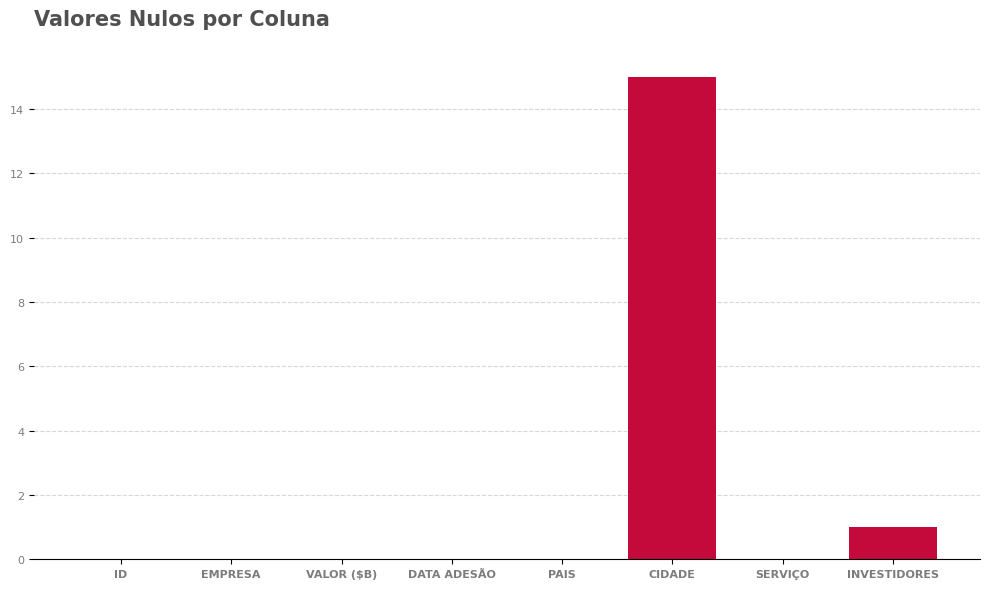

In [ ]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Valores Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# rotulos de eixo
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    nulos.index, 
    nulos.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



Utilizando a biblioteca `matplotlib` criamos a visualização de um gráfico de barras, repreentando a quantidade de valores `null` para cada coluna da tabela.

Com isso é podemos analisar um possível impacto da falta desses valores nas nossas análises posteriores, mas nem sempre os gráficos representam a importância de um valor corretamente se não for utilizado de maneira certa.

In [144]:
total_linhas = len(data_base)

percentual = (nulos / total_linhas) * 100

percentual

ID              0.000000
EMPRESA         0.000000
VALOR ($B)      0.000000
DATA ADESÃO     0.000000
PAIS            0.000000
CIDADE          1.602564
SERVIÇO         0.000000
INVESTIDORES    0.106838
dtype: float64

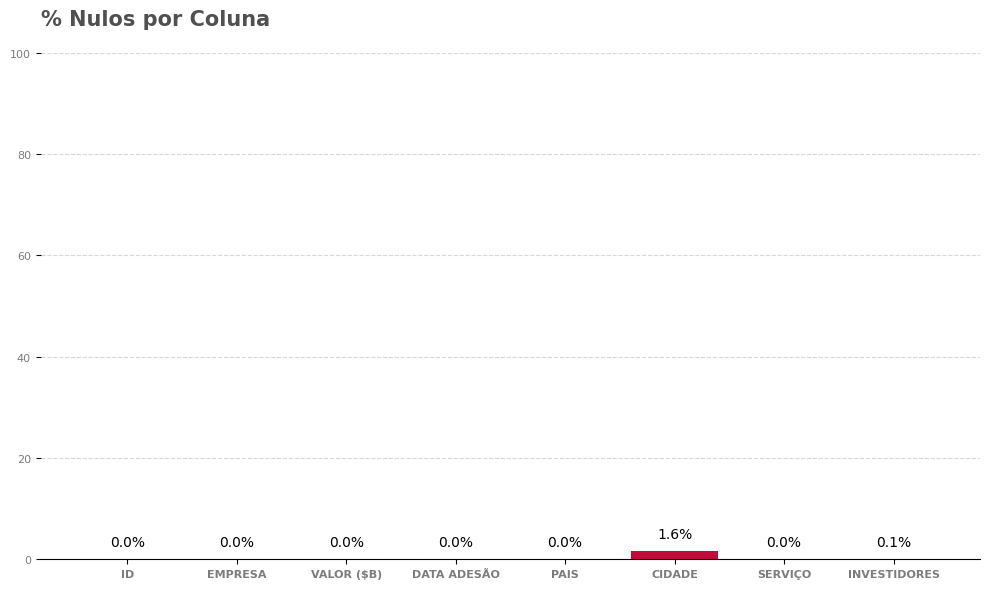

In [ ]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    '% Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.ylim(0, 100)
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    percentual.index, 
    percentual.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(percentual.values):
    plt.text(
            p,
            v + 2,  
            f"{v:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



agora, transformando os valores nulos em porcentagem do total de linhas é possivel ter a real noção do impacto que a falta de informações pode ter para cada coluna

In [135]:
# valores unicos 

data_base.nunique()

ID              936
EMPRESA         935
VALOR ($B)      192
DATA ADESÃO     589
PAIS             47
CIDADE          239
SERVIÇO          17
INVESTIDORES    920
dtype: int64

In [136]:
# lista dos valores unicos da coluna SERVIÇO

data_base['SERVIÇO'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [137]:
# quantidade de repetições de cada valor 
data_base['SERVIÇO'].value_counts()

SERVIÇO
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

In [138]:
# quantidade percentual de repetições de cada valor 
data_base['SERVIÇO'].value_counts(normalize=True) # normalize=True transforma a quantidade de valores em percentual

SERVIÇO
Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: proportion, dtype: float64

após esses 3 analises rapidas do bd podemos perceber o valor "finttech" que é uma digitação errada do valor "fintech", que devemos alterar para não causar problemas na nossa analise grafica

In [139]:
data_base.SERVIÇO.replace({
    'Finttech': 'Fintech'
    }, inplace=True
)
  

C:\Users\marco\AppData\Local\Temp\ipykernel_27580\2213024652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_base.SERVIÇO.replace({


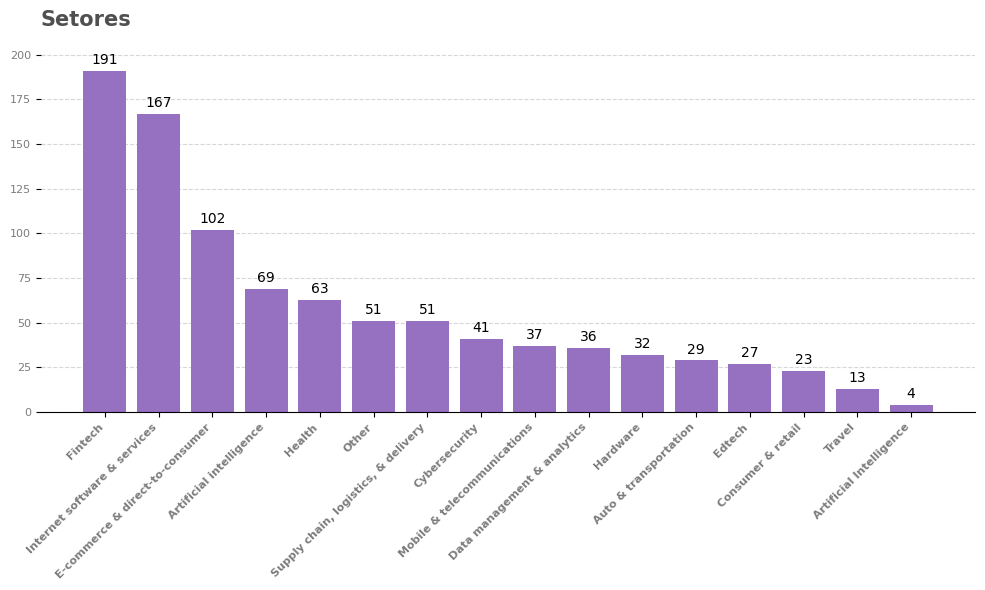

In [140]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Setores', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    data_base['SERVIÇO'].value_counts().index,
    data_base['SERVIÇO'].value_counts().values,
    color = "#9671C2", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(data_base['SERVIÇO'].value_counts()):
    plt.text(p, v + 2,
              str(v), 
              ha="center", 
              va="bottom", 
              fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



In [141]:
# constroi porcentagem
porcentagem_pais = round(data_base['PAIS'].value_counts(normalize=True) * 100, 1)
# retorna os top 3 paises
top3_pais = porcentagem_pais.sort_values(ascending=False)[:3]
# soma o restante
outros_pais = porcentagem_pais.sort_values(ascending=False)[3:].sum()
# cria nova serie 
pie_pais = top3_pais.copy()
pie_pais['Outros'] = outros_pais

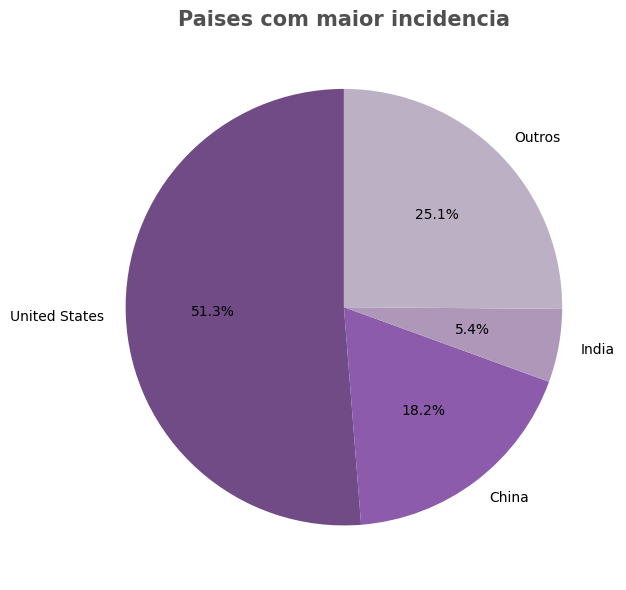

In [142]:
# tamanho do grafico
plt.figure(
    figsize=(10,6)
)
#titulo
plt.title(
    'Paises com maior incidencia', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )
# pizza
plt.pie(
    pie_pais,
    labels=pie_pais.index,
    startangle=90,
    autopct='%1.1f%%',
    colors=[
         "#704B86",
         "#8C5BAC",  
         "#AF97B9",   
         "#BCB0C5" 
    ]
);
plt.tight_layout()

# 4. Análise Exploratória (deixar todos os graficos e conclusões sobre aqui)